## FM Formula

Frequency modulation with two sinusoidal oscillators 
can be written as follows:

$x(t) = A \sin(\omega_\alpha t + I \sin(\omega_\beta t) )$

Modulation Index:

$I = \frac{\Delta f}{\Delta f_m}$


## Spectrum of Frequency Modulation

Compared to amplitude modulation techniques, 
FM generates more spectral components, which 
can be illustrated when calculating the Fourier 
transform of the FM formula.
It is solved using trigonometric identities:



$x(t)   =   \cos(\omega_\alpha t + I \sin(\omega_\beta t) )$

- $\text{with:} \cos(a+b) = \cos(a) \cos(b) - \sin(a) \sin(b)$

$= \cos(\omega_\alpha t) \cos(I \sin(\omega_\beta t))
-  \sin(\omega_\alpha t) \sin(I \sin(\omega_\beta t))$

- $\text{with:} \cos(a) \cos(b) = \frac{1}{2} \left( \cos(a-b) + \cos(a+b) \right)$

- $\text{and:} \sin(a) \sin(b) = \frac{1}{2} \left( \cos(a-b) - \cos(a+b) \right)$

$=  \frac{1}{2} (
\sin(\omega_\alpha t + I \sin(\omega_\alpha t)) 
+ \sin(\omega_\alpha t - I \sin(\omega_\alpha t))
+ \sin(\omega_\alpha t + I \sin(\omega_\alpha t)) 
+ \sin( I \sin(\omega_\alpha t) - \omega_\alpha t) )$




 
**Bessel functions**

The above equation can be expressed as a Bessel function:

 
$\sin(\omega_\alpha t + I \sin(\omega_\alpha t)) =$

$J_0(I) \cos(\omega_\alpha)$

$+ J_1(I) \cos(\omega_\alpha - \omega_\beta)t - \cos(\omega_\alpha + \omega_\beta)t$

$- J_2(I) \cos(\omega_\alpha - 2 \omega_\beta)t + \cos(\omega_\alpha + 2 \omega_\beta)t$

$+ ...$

 
 
 The spectrum of FM signals thus has an infinite number 
 of sidebands which are increased in energy for high modulation 
 indices.
 
 
## Harmonic vs Inharmonic


Depending on the ratio between modulator and carrier,
the FM spectrum has different properties.
In the formula for the FM sidebands is is obvious 
that for integer ratios between carrier to modulator,
all sidebands are integer multiples of the fundamental frequency.


# Interactive Visualisation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy import signal
from IPython.display import display, Markdown, clear_output
import IPython.display as ipd

from ipywidgets import *

###############################################################################
# parameters

 
f_car       = 100  # carrier frequency
f_mod       = 100 # signal frequency
 
mod_ind     = 10
 

###############################################################################
# function for FM with outputs for carrier and modulator

def fm(f_car, f_mod, m, t):
 
    x_car = np.sin(2*np.pi*f_car*t)
    x_mod = np.sin(2*np.pi*f_mod*t)


    y = np.sin(2*np.pi*f_car*t+ m * x_mod)
    
    return [y, x_car, x_mod]

 
###############################################################################
# axis and signals

fs  = 48000
d   = 1
L   = round(d*fs)

t   = np.linspace(0,d,L)    
f   = np.linspace(-0.5,0.5,L)
 
    


<IPython.core.display.Javascript object>


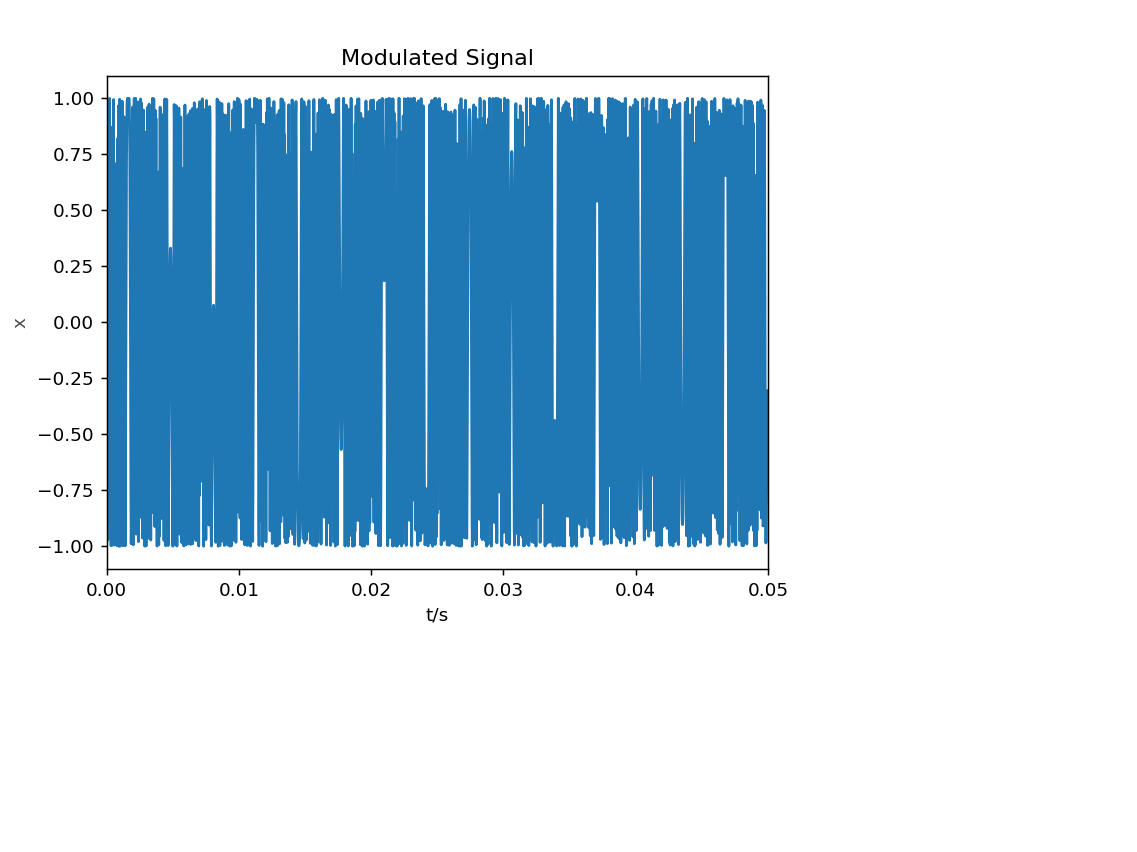

interactive(children=(IntSlider(value=10, description='mod_ind', max=1000), IntSlider(value=100, description='…

In [12]:
###############################################################################
# Time domain

[x, x_car, x_sig] = fm(f_mod, f_car, mod_ind, t)
 

fig1, ax1 = plt.subplots()
 
plt.title("Modulated Signal")

ax1.set_xlabel('t/s')
ax1.set_ylabel('x' ,color = [ 0.3, 0.3, 0.3])
ax1.set_xlim(0, 0.05) 

ipd.display(ipd.Audio(x, rate=fs))

line, = ax1.plot(t,x);

def update(mod_ind = widgets.IntSlider(min = 0, max= 1000, step=1, value=10),
             f_mod = widgets.IntSlider(min = 1, max= 1000, step=1, value=100),
             f_car = widgets.IntSlider(min = 1, max= 1000, step=1, value=100)):  
    
    [x, x_car, x_sig] = fm(f_mod, f_car, mod_ind, t)
 
    
    line.set_ydata(x)
    fig1.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
interact(update);    

<IPython.core.display.Javascript object>


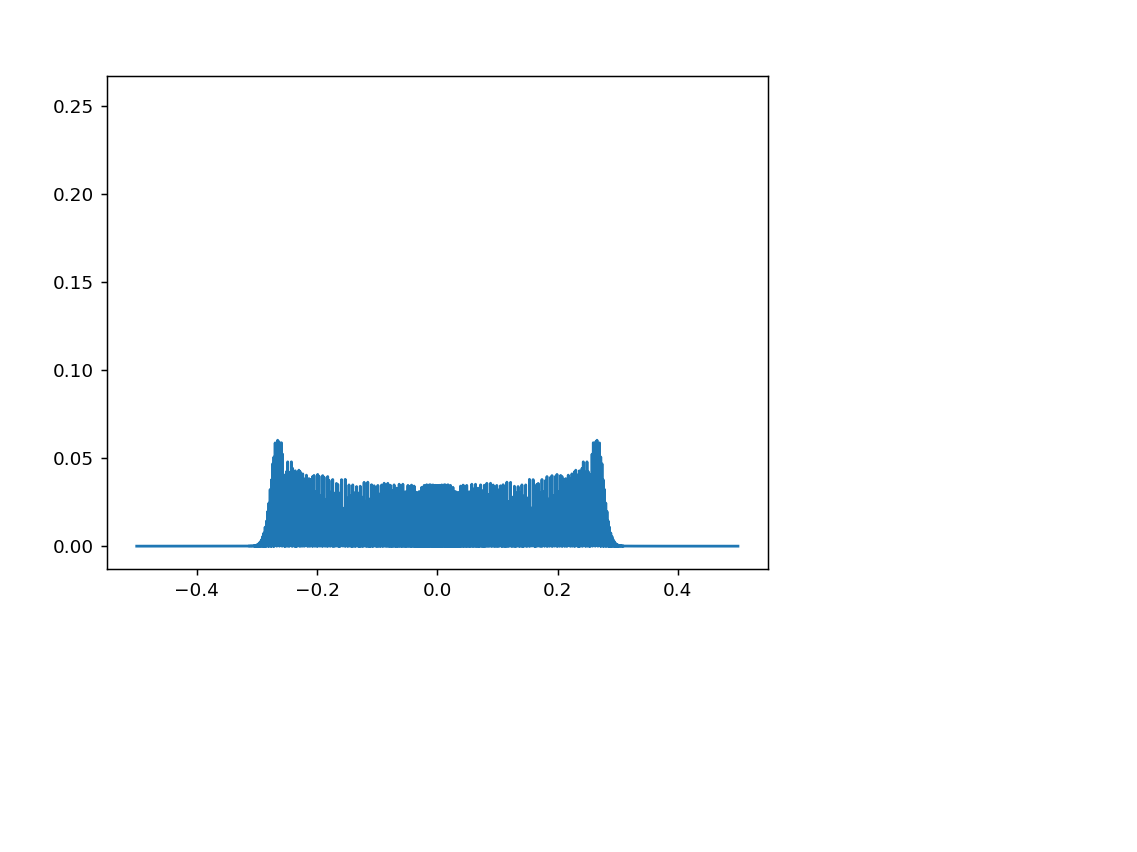

interactive(children=(IntSlider(value=10, description='mod_ind', max=1000), IntSlider(value=100, description='…

In [13]:
# in the frequency domain

 
[x, x_car, x_sig] = fm(f_mod, f_car, mod_ind, t)
 
# fft stuff   
X = np.fft.fftshift(np.fft.fft(x))
X = X/(L)

X_car = np.fft.fftshift(np.fft.fft(x_car))
X_car = X_car/(L)

X_sig = np.fft.fftshift(np.fft.fft(x_sig))
X_sig = X_sig/(L)


fig1, ax1 = plt.subplots()
 
#ax1.set_xlabel('t/s')
#ax1.set_ylabel('x' ,color = [ 0.3, 0.3, 0.3])
#ax1.set_xlim(0, 0.05) 

# for static HTML output:
line, = ax1.plot(f,abs(X));
ipd.display(ipd.Audio(x, rate=fs))

# for interactive output:
def update(mod_ind = widgets.IntSlider(min = 0, max= 1000, step=1, value=10),
             f_mod = widgets.IntSlider(min = 1, max= 1000, step=1, value=100),
             f_car = widgets.IntSlider(min = 1, max= 1000, step=1, value=100)):  
    
    [x, x_car, x_sig] = fm(f_mod, f_car, mod_ind, t)
 
    X = np.fft.fftshift(np.fft.fft(x))
    X = X/(L)

    X_car = np.fft.fftshift(np.fft.fft(x_car))
    X_car = X_car/(L)

    X_sig = np.fft.fftshift(np.fft.fft(x_sig))
    X_sig = X_sig/(L)

    line.set_ydata(abs(X))
    fig1.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
interact(update);    



